# Hidden Figures

A simulation of Space Capsule Re-entry by Argyris Kriezis and Sparsh Bansal

# What is the range within which the angle of trajectory of a space capsule should lie to enabe it to enter Earth's atmosphere (and not bounce back into space) as well as to bear the heat produced on the heat shield without burning away?

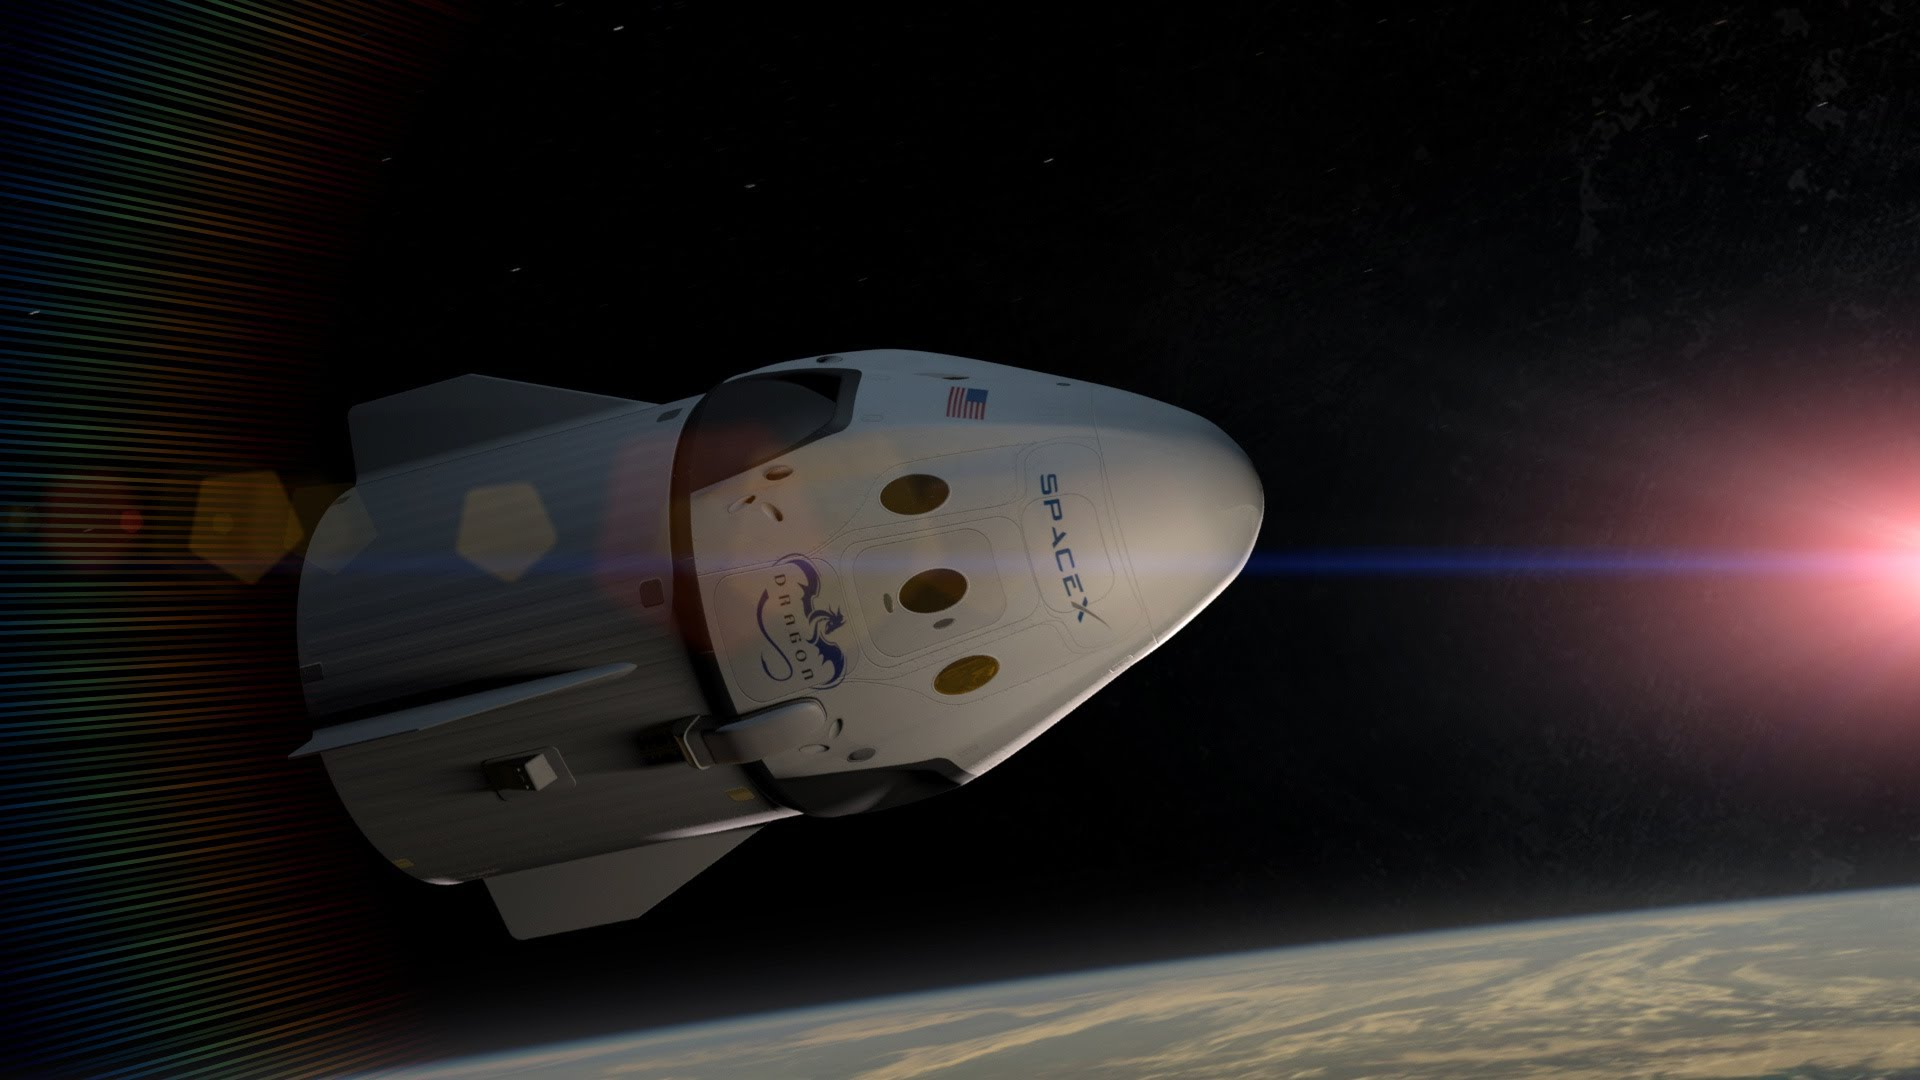

Image credits - Crew Dragon 2 capsule manufactured by SpaceX, and run by NASA and SpaceX.

Factors causing the heat energy transfer:

(i) Friction due to the atmostphere - Force of Drag
(ii) Heat lost to the atmosphere

When a large object enters the atmosphere at high speed, the air in front of it gets compressed so much that it becomes extremely hot.

Parameters that affect the heat energy production:

(i) Velocity of the spacecraft (m/s)
(ii) Radius of the nose (m)
(iii) Air Density (kg/m^3)

In [47]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from scipy import *

In [48]:
from pandas import read_csv
density_data = read_csv("Model_Data.csv")
density_data.columns = ['Altitude', 'Scale Height', 'Atmospheric_Density']

In [49]:
print(density_data)

   Altitude  Scale Height  Atmospheric_Density
0         0           8.4         1.225000e+00
1       100           5.9         5.250000e-07
2       150          25.5         1.730000e-09
3       200          37.5         2.410000e-10
4       250          44.8         5.970000e-11
5       300          50.3         1.870000e-11
6       350          54.8         6.660000e-12
7       400          58.2         2.620000e-12
8       450          61.3         1.090000e-12
9       500          64.5         4.760000e-13
10      550          68.7         2.140000e-13
11      600          74.8         9.890000e-14
12      650          84.4         4.730000e-14
13      700          99.3         2.360000e-14
14      750         121.0         1.240000e-14
15      800         151.0         6.950000e-15
16      850         188.0         4.220000e-15
17      900         226.0         2.780000e-15
18      950         263.0         1.980000e-15
19    1,000         296.0         1.490000e-15
20    1,250  

We assume constant atmosperic density in intervals of 50,000 meters according to the atmospheric density data published by NASA.

The capsule mass(m), Drag Coefficient(Cd), and Radius of nose(r) have been based on the Crew Dragon 2 capsule.

We assume that the capsule enters 

In [50]:
m = 8857
g = 9.8
Cd = 1
r = 1.85

1.85

# Re-entry from Earth

The calculation of the initial values of Kinetic Energy(KE), Potential Energy(PE), and Mechanical Energy(ME) have been made on the basis of the orbital velocity(V) and height of the capsule(h).

In [51]:
def make_system (V, h, ρ, Θ, dt):
    
    '''
    m = mass of the capsule during re-entry
    V = Velocity of the spacecraft
    ρ = Fluid density of the atmosphere
    r = radius of the nose
    dt = time step
    KE = Kinetic Energy of the Capsule
    PE = Potential Energy of the Capsule
    ME = Mechanical Energy of the Capsule
    h = Height of the Capsule from the surface of the Earth
    HS = Heat generated on the heat shield
    HA = Heat lost to the atmosphere
    Θ = Angle of trajectory
    '''
    init_earth = State(KE = 262565765000, PE = 23293574582, ME = 285859339582, HS = 0, HA = 0)
    init_moon = State(KE = 518646806594, PE = 23293574582, ME = 541940381176, HS = 0, HA = 0)
    init_mars = State(KE = 575527860000, PE = 23293574582, ME = 285859339582, HS = 0, HA = 0)
    
    t_0 = 0
    t_end = 500
    return System(V=V, h=h, ρ=ρ, dt=dt, 
                  init_earth=init_earth,
                  init_moon=init_moon,
                  init_mars=init_mars,
                  t_0=t_0, Θ=Θ, t_end = t_end)

In [52]:
system_earth = make_system(V=7700, h=300000, ρ=0.0000000000258, Θ=0.122173, dt=1)

,values
V,7700
h,300000
ρ,2.58e-11
dt,1
init_earth,KE 262565765000 PE 23293574582 ME 28...
init_moon,KE 518646806594 PE 23293574582 ME 54...
init_mars,KE 575527860000 PE 23293574582 ME 28...
t_0,0
Θ,0.122173
t_end,500


In [53]:
import math

In [54]:
def update_func_earth(state, t, system_earth):
    
    KE, PE, ME, HS, HA = state
    
    dt = 1
    
    dHSdt = (1.83 * (10 ** (-4)) * (system_earth.V ** 3) * ((system_earth.ρ/r) ** 0.5))
    dVdt = (m * g * math.sin(system_earth.Θ) - (0.5 * system_earth.ρ * (system_earth.V ** 2) * 3.14 * (r ** 2) * Cd))/m
    dKEdt = 0.5 * m * (dVdt ** 2) 
    dhdt = system_earth.V * math.sin(system_earth.Θ) * dt
        
    if h > 300000:
        system_earth.ρ = 1.870000e-11
    if 300000 > h > 250000:
        system_earth.ρ = 5.970000e-11
    if 250000 > h > 200000:
        system_earth.ρ = 2.410000e-10
    if 200000 > h > 150000:
        system_earth.ρ = 1.730000e-09
    if 150000 > h > 100000:
        system_earth.ρ = 5.250000e-07
    if 100000 > h > 0:
        system_earth.ρ = 1.225000e+00
        
    dh = dhdt*dt
    dHS = dHSdt*dt
    dPE = (m * g * dhdt * dt)
    dKE = dKEdt*dt
    dV = dVdt*dt
        
    system_earth.V = system_earth.V - dV
    system_earth.h = system_earth.h - dh
    HS = HS + dHS
    ME = ME - dKE - dPE
    PE = PE - dPE
    KE = KE - dKE
    HA = ME - HS
    
    ##if PE<0:
    ##    print(HS)
    
    return State(KE=KE, PE=PE, ME=ME, HS=HS, HA=HA)

In [55]:
def run_simulation_earth(system_earth, update_func_earth):
    unpack(system_earth)
    
    frame_earth = TimeFrame(columns=init_earth.index)
    frame_earth.row[t_0] = init_earth
    
    for t in linrange(t_0, t_end):
        frame_earth.row[t+1] = update_func_earth(frame_earth.row[t], t, system_earth)
        
    return frame_earth

# Results of the first simulation - Energy Conservation for the capsule system re-entering Earth at a constant angle of trajectory of 6°

Heat generated on the heat shield of the capsule should increase from an initial amount of 0 joules.

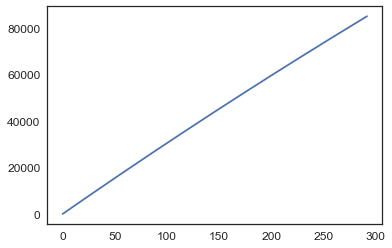

In [56]:
system_earth.t_end = 292
updated_factors = run_simulation_earth(system_earth, update_func_earth)
updated_factors.HS.plot()

Heat lost to the atmoshphere in Joules

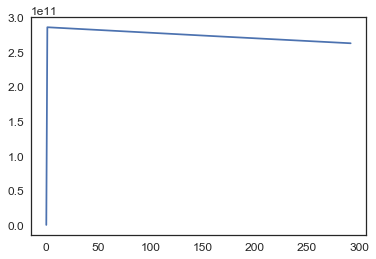

In [57]:
updated_factors.HA.plot()

The Kinetic Energy of the capsule should decrease due to the frictional forces of the atmoshphere. The velocity of the capsule decreases until it reaches terminal velocity and the parachutes are deployed.

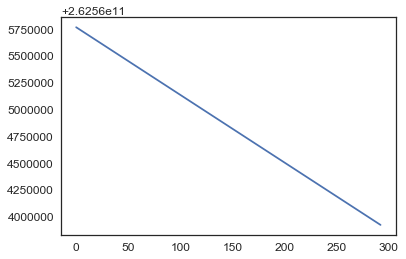

In [58]:
updated_factors.KE.plot()

The Potential Energy of the capsule should decrease due to the descent in height with respect to sea level on Earth.

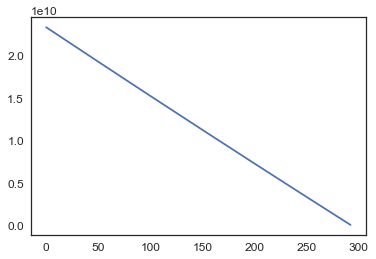

In [59]:
updated_factors.PE.plot()

The Mechanical Energy should decrease in general, because both the Potential Energy as well as the Kinetic Energy decrease as the capsule re-enters Earth.

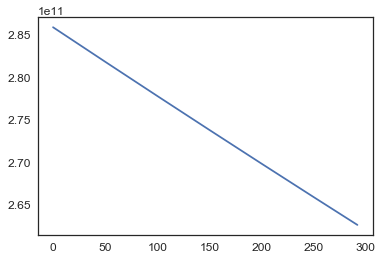

In [60]:
updated_factors.ME.plot()

In [61]:
Total_HS = trapz([updated_factors.HS])

array([12715062.488622034], dtype=object)

# Results

def calc_total_heat_produced(results):
    """Takes in angle of trajectory of re-entry
    
    results: DataFrame with columns KE, PE, ME, HS, HA
    
    returns: total heat produced
    """
    return results.HS

Θ_array = linspace(5, 7, 11)

for Θ in Θ_array:
    system = make_system(V, h, ρ, Θ, dt)
    results = run_simulation(system, update_func)
    print(system.Θ, calc_total_heat_produced(results))

def sweep_Θ(Θ_array, V):
    """Sweep a range of values for Θ.
    
    Θ_array: array of Θ values
    r: radius of the nose
    
    returns: SweepSeries that maps from Θ to total heat produced
    """
    sweep = SweepSeries()
    for Θ in Θ_array:
        system = make_system(V, h, ρ, Θ, dt)
        results = run_simulation(system, update_func)
        sweep[system.Θ] = calc_total_heat_produced(results)
    return sweep

heat_sweep = sweep_Θ(Θ_array, V)

# Re-entry from Moon

In [62]:
system_moon = make_system(V=10822, h=300000, ρ=0.0000000000258, Θ=0.122173, dt=1)

,values
V,10822
h,300000
ρ,2.58e-11
dt,1
init_earth,KE 262565765000 PE 23293574582 ME 28...
init_moon,KE 518646806594 PE 23293574582 ME 54...
init_mars,KE 575527860000 PE 23293574582 ME 28...
t_0,0
Θ,0.122173
t_end,500


In [63]:
def update_func_moon(state, t, system_moon):
    
    KE, PE, ME, HS, HA = state
    
    dt = 1
    
    dHSdt = (1.83 * (10 ** (-4)) * (system_moon.V ** 3) * ((system_earth.ρ/r) ** 0.5))
    dVdt = (m * g * math.sin(system_moon.Θ) - (0.5 * system_earth.ρ * (system_moon.V ** 2) * 3.14 * (r ** 2) * Cd))/m
    dKEdt = 0.5 * m * (dVdt ** 2) 
    dhdt = system_moon.V * math.sin(system_moon.Θ) * dt
        
    if h > 300000:
        system_earth.ρ = 1.870000e-11
    if 300000 > h > 250000:
        system_earth.ρ = 5.970000e-11
    if 250000 > h > 200000:
        system_earth.ρ = 2.410000e-10
    if 200000 > h > 150000:
        system_earth.ρ = 1.730000e-09
    if 150000 > h > 100000:
        system_earth.ρ = 5.250000e-07
    if 100000 > h > 0:
        system_earth.ρ = 1.225000e+00
        
    dh = dhdt*dt
    dHS = dHSdt*dt
    dPE = (m * g * dhdt * dt)
    dKE = dKEdt*dt
    dV = dVdt*dt
        
    system_moon.V = system_moon.V - dV
    system_moon.h = system_moon.h - dh
    HS = HS + dHS
    ME = ME - dKE - dPE
    PE = PE - dPE
    KE = KE - dKE
    HA = ME - HS
        
    ##if PE<0:
    ##    print(HS)
    
    return State(KE=KE, PE=PE, ME=ME, HS=HS, HA=HA)

In [64]:
def run_simulation_moon(system_moon, update_func_moon):
    unpack(system_moon)
    
    frame_moon = TimeFrame(columns=init_moon.index)
    frame_moon.row[t_0] = init_moon
    
    for t in linrange(t_0, t_end):
        frame_moon.row[t+1] = update_func_moon(frame_moon.row[t], t, system_moon)
        
    return frame_moon

# Results of the second simulation - Energy Conservation for the capsule system re-entering Earth returning from Moon at a constant angle of trajectory of 6

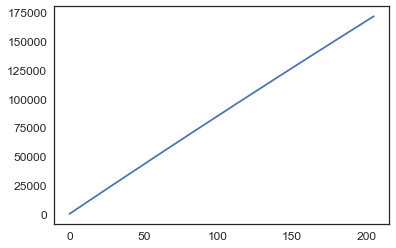

In [65]:
system_moon.t_end=205
updated_factors_moon = run_simulation_moon(system_moon, update_func_moon)
updated_factors_moon.HS.plot()

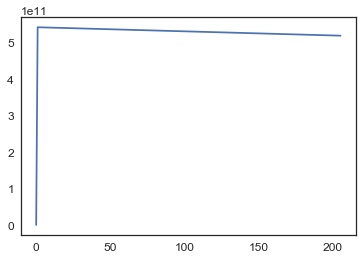

In [66]:
updated_factors_moon.HA.plot()

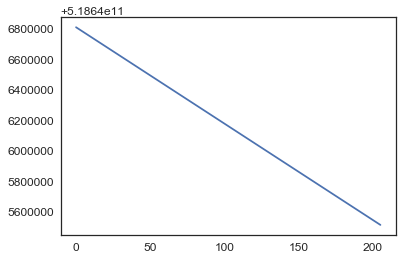

In [67]:
updated_factors_moon.KE.plot()

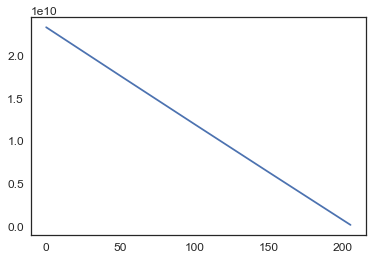

In [68]:
updated_factors_moon.PE.plot()

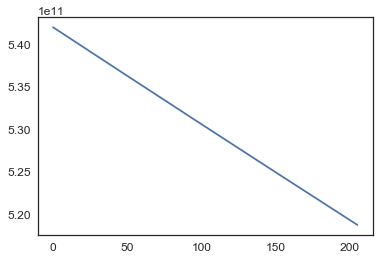

In [69]:
updated_factors_moon.ME.plot()

In [70]:
Total_HS = trapz([updated_factors_moon.HS])

array([17796010.124642134], dtype=object)

# Results

# Re-entry from Mars

In [71]:
system_mars = make_system(V=11400, h=300000, ρ=0.0000000000258, Θ=0.122173, dt=1)

,values
V,11400
h,300000
ρ,2.58e-11
dt,1
init_earth,KE 262565765000 PE 23293574582 ME 28...
init_moon,KE 518646806594 PE 23293574582 ME 54...
init_mars,KE 575527860000 PE 23293574582 ME 28...
t_0,0
Θ,0.122173
t_end,500


In [72]:
def update_func_mars(state, t, system_mars):
    
    KE, PE, ME, HS, HA = state
    
    dt = 1
    
    dHSdt = (1.83 * (10 ** (-4)) * (system_mars.V ** 3) * ((system_earth.ρ/r) ** 0.5))
    dVdt = (m * g * math.sin(system_mars.Θ) - (0.5 * system_earth.ρ * (system_mars.V ** 2) * 3.14 * (r ** 2) * Cd))/m
    dKEdt = 0.5 * m * (dVdt ** 2) 
    dhdt = system_mars.V * math.sin(system_mars.Θ) * dt
        
    if h > 300000:
        system_earth.ρ = 1.870000e-11
    if 300000 > h > 250000:
        system_earth.ρ = 5.970000e-11
    if 250000 > h > 200000:
        system_earth.ρ = 2.410000e-10
    if 200000 > h > 150000:
        system_earth.ρ = 1.730000e-09
    if 150000 > h > 100000:
        system_earth.ρ = 5.250000e-07
    if 100000 > h > 0:
        system_earth.ρ = 1.225000e+00
        
    dh = dhdt*dt
    dHS = dHSdt*dt
    dPE = (m * g * dhdt * dt)
    dKE = dKEdt*dt
    dV = dVdt*dt
        
    system_mars.V = system_mars.V - dV
    system_mars.h = system_mars.h - dh
    HS = HS + dHS
    ME = ME - dKE - dPE
    PE = PE - dPE
    KE = KE - dKE
    HA = ME - HS
    
    ##if PE<0:
    ##    print(HS)
    
    return State(KE=KE, PE=PE, ME=ME, HS=HS, HA=HA)

In [73]:
def run_simulation_mars(system_mars, update_func_mars):
    unpack(system_mars)
    
    frame_mars = TimeFrame(columns=init_mars.index)
    frame_mars.row[t_0] = init_mars
    
    for t in linrange(t_0, t_end):
        frame_mars.row[t+1] = update_func_mars(frame_mars.row[t], t, system_mars)
        
    return frame_mars

# Results of the third simulation - Energy Conservation for the capsule system re-entering Earth returning from Mars at a constant angle of trajectory of 6

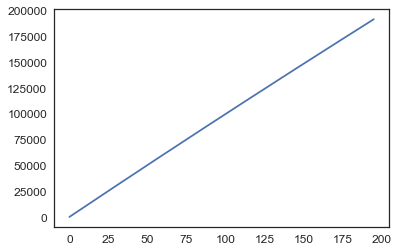

In [74]:
system_mars.t_end=195
updated_factors_mars = run_simulation_mars(system_mars, update_func_mars)
updated_factors_mars.HS.plot()

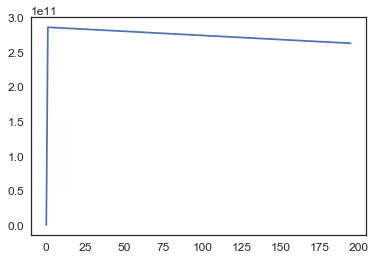

In [75]:
updated_factors_mars.HA.plot()

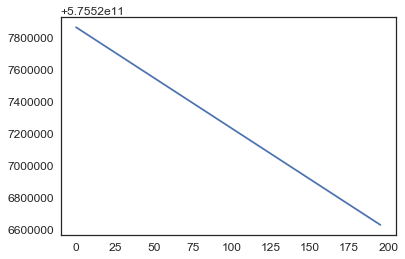

In [76]:
updated_factors_mars.KE.plot()

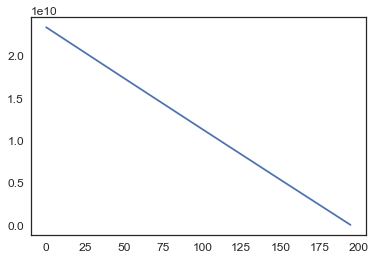

In [77]:
updated_factors_mars.PE.plot()

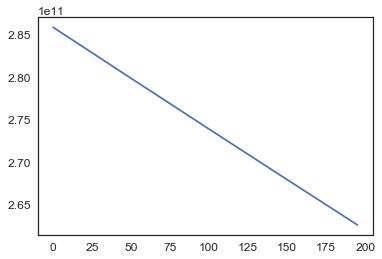

In [78]:
updated_factors_mars.ME.plot()

In [79]:
Total_HS = trapz([updated_factors_mars.HS])

array([18863637.954840995], dtype=object)

# Results

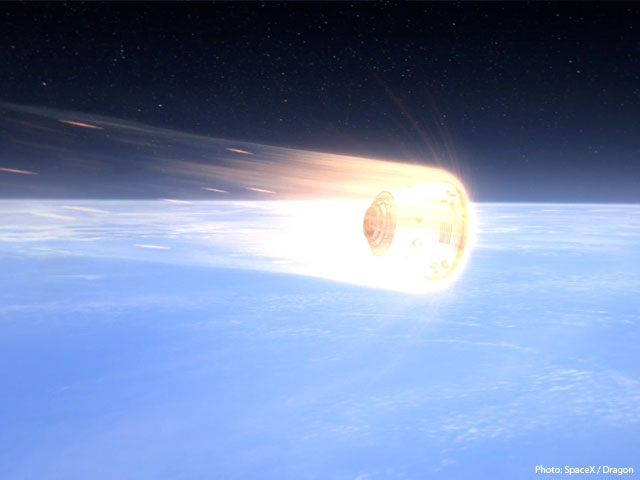

In [80]:
HA_orbit= 85389.78; ## heat of heatshield as found from the data
HA_moon=172464;## heat of heatshield as found from the data
HA_mars=192448.98 ## heat of heatshield as found from the data
HSm = 36; ## mass of heatsield 
C =1.26 ; ## specific heat capacity of heatshield 
Ti =4 ; #initial temprture of heat sield at space in kelvin

In [81]:
Tf_orbit = (HA_orbit / (C *HSm))+Ti;
print(Tf_orbit);

1886.4907407407406


The re-entry temprature of a capsule from orbit is about 1900K (https://www.spacex.com/news/2013/04/04/pica-heat-shield)

In [82]:
Tf_moon = (HA_moon / (C *HSm))+Ti;
print(Tf_moon);

3806.1164021164022


The re-entry temprature of a capsule from orbit is about 3000K
(https://science.howstuffworks.com/apollo-spacecraft7.htm)


In [83]:
Tf_mars = (HA_mars / (C *HSm))+Ti;
print(Tf_mars);

4246.702380952382


The orion spacecraft experianced a temprture of 2500K at re-entry with 80% of the actual speed (9000m/s) (https://www.nasa.gov/feature/five-orion-technologies-that-will-help-us-get-home-from-mars)

# Interpretations

The re-entry from orbit result is resonalbe as from spacex's actual data we know that the re-entry temperture experianced during re-entry from orbit is about 1900K and also most vechicals lke the space shuttle and the apollo spacecraft had aproximately the same maximum re-entry temperature.

The re-entry from moon results are also in a resonable frame, not that accurate as the re-entry from orbit results. The only actual data we can compare it with is the data from the apollo program that show that the re-entry temprature is about 3000K. However, our result is ~3800K kelvin and this is probably due to limitations of our model and that due to the fact that the dragon capsule is bigger than appolo capsule.

It is much more difficult to asses the validity of the data of the re-entry of a capsule coming from mars as there is no capsule that has achived that yet. The closest estimate we can get is by the tests of the orion capsule wich reached a temperature of 2500K on a test with 80% of the actual speed (less than the re-entry speed of a lunar mission). The data we got seem to be resonable and maybe a bit higher than expected but this might be due to limitations of the model.

Those resutls, can be used by spacex in order to test the vechical and verify that it can handle the re-entry heat of a trip to orbit, moon or mars.  